In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.metrics import accuracy_score,confusion_matrix, log_loss

#Data import

In [ ]:
train=pd.read_csv("train.csv",index_col=0)
test=pd.read_csv("test.csv",index_col=0)
submit=pd.read_csv("sample_submission.csv")

y=train['credit']
train=train.drop(axis=1, labels=['credit'])

test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
# index 와 FLAG_MOBIL 제거
train = train.drop('FLAG_MOBIL',axis=1)
test=test.drop(axis=1,labels=['FLAG_MOBIL'])

In [ ]:
#문자로 된것들 라벨인코딩

train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')

print('edu_type')
train['edu_type'] = train['edu_type'].replace([ 'Academic degree','Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary'],[4,3,2,1,0])
test['edu_type'] = test['edu_type'].replace([ 'Academic degree','Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary'],[4,3,2,1,0])
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
edu_type
--------------


In [ ]:
# income total 전처리
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000

#income_total

In [ ]:
#나눌 개수 : n_income
n_income=10
count, bin_dividers =np.histogram(train['income_total'], bins=n_income)
bin_names=['소득'+str(i) for i in range(n_income) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [ ]:
train['income_total'].value_counts()

소득0    16212
소득1     8330
소득2     1530
소득3      206
소득4      121
소득5       44
소득9        5
소득8        4
소득6        3
소득7        2
Name: income_total, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [ ]:
print(len(train['occyp_type'].unique()))

train['occyp_type']=train['occyp_type'].fillna('None')
test['occyp_type']=test['occyp_type'].fillna('None')
train['occyp_type'] = train['occyp_type'].replace(['None', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
test['occyp_type'] = test['occyp_type'].replace(['None', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

19


#구간화

In [ ]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

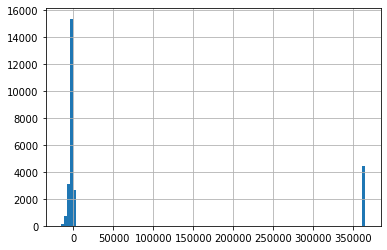

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=100)

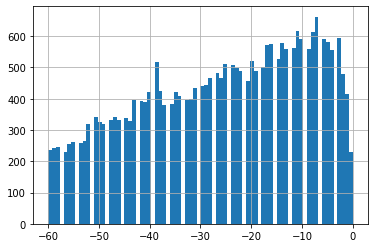

In [ ]:
train['begin_month'].hist(bins=80)

##DAYS_EMPLOYED,begin_month

In [ ]:
# make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=500)
make_bin('begin_month', n=4)

In [ ]:
train['DAYS_BIRTH'].value_counts()

-12676    40
-15519    38
-14667    32
-15140    26
-16768    24
          ..
-9353      1
-9901      1
-21655     1
-11767     1
-15726     1
Name: DAYS_BIRTH, Length: 6621, dtype: int64

In [ ]:
train['DAYS_EMPLOYED'].value_counts()

2     4484
0     4438
3     3940
4     3036
1     2668
5     2428
6     1500
7     1003
8      894
10     424
9      392
11     372
12     231
13     188
14     149
15     102
17      67
16      55
18      33
20      25
21      20
19       8
Name: DAYS_EMPLOYED, dtype: int64

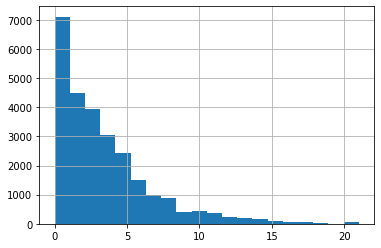

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=20)

In [ ]:
train['begin_month'].value_counts()

0    8712
1    7418
2    6025
3    4302
Name: begin_month, dtype: int64

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,3,1,2,-13899,7,0,0,0,0,2.0,0
1,0,0,1,1,1,0,2,0,1,-11380,3,0,0,1,1,3.0,0
2,1,1,1,0,2,4,3,1,1,-19087,7,0,1,0,2,2.0,1
3,0,0,1,0,1,0,2,1,1,-15088,4,0,1,0,3,2.0,2
4,0,1,1,0,0,2,3,1,1,-15037,4,0,0,0,2,2.0,1


##Child num

In [ ]:
for i in range(len(train['child_num'])):
    if train['child_num'][i]>5:
            train['child_num'][i]=6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
6        6
Name: child_num, dtype: int64

##Family size

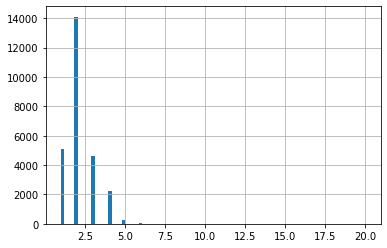

In [ ]:
train['family_size'].hist(bins=90)

In [ ]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
for i in range(len(train['family_size'])):
    if train['family_size'][i]>5:
            train['family_size'][i]=6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#DAYS_BIRTH

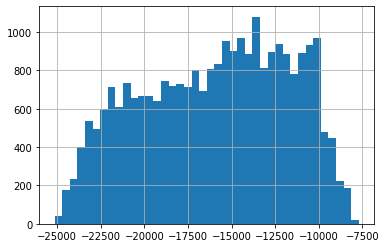

In [ ]:
train['DAYS_BIRTH'].hist(bins=40)

In [ ]:
train['DAYS_BIRTH'].value_counts()

-12676    40
-15519    38
-14667    32
-15140    26
-16768    24
          ..
-9353      1
-9901      1
-21655     1
-11767     1
-15726     1
Name: DAYS_BIRTH, Length: 6621, dtype: int64

나이대별로 나누기

In [ ]:
train['Age'] = abs(train['DAYS_BIRTH'])/365
train = train.astype({'Age': 'int'})
for i in range(0,len(train['Age'])):
  if 20<= train['Age'][i]<= 29:
    train['Age'][i] = 20
  elif 30<= train['Age'][i]<= 39:
    train['Age'][i] = 30
  elif 40<= train['Age'][i]<= 49:
    train['Age'][i] = 40
  elif 50<= train['Age'][i]<= 59:
    train['Age'][i] = 50
  elif 60<= train['Age'][i]<= 69:
    train['Age'][i] = 60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib

In [ ]:
train['Age'].value_counts()

30    7585
40    6769
50    5739
20    3608
60    2756
Name: Age, dtype: int64

In [ ]:
train=train.drop(axis=1, labels=['DAYS_BIRTH'])

#scaling

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,3,1,2,7,0,0,0,0,2.0,0,30
1,0,0,1,1,1,0,2,0,1,3,0,0,1,1,3.0,0,30
2,1,1,1,0,2,4,3,1,1,7,0,1,0,2,2.0,1,50
3,0,0,1,0,1,0,2,1,1,4,0,1,0,3,2.0,2,40
4,0,1,1,0,0,2,3,1,1,4,0,0,0,2,2.0,1,40


In [ ]:
print("gender",len(train['gender'].unique()),train['gender'].unique())
print("car",len(train['car'].unique()),train['car'].unique())
print("reality",len(train['reality'].unique()),train['reality'].unique())
print("income_total",len(train['income_total'].unique()),train['income_total'].unique())
print("income_type",len(train['income_type'].unique()),train['income_type'].unique())
print("edu_type",len(train['edu_type'].unique()),train['edu_type'].unique())
print("family_type",len(train['family_type'].unique()),train['family_type'].unique())
print("house_type",len(train['house_type'].unique()),train['house_type'].unique())
print("DAYS_EMPLOYED",len(train['DAYS_EMPLOYED'].unique()),train['DAYS_EMPLOYED'].unique())
print("work_phone",len(train['work_phone'].unique()),train['work_phone'].unique())
print("email",len(train['email'].unique()),train['email'].unique())
print("occyp_type",len(train['occyp_type'].unique()),train['occyp_type'].unique())
print("family_size",len(train['family_size'].unique()),train['family_size'].unique())
print("begin_month",len(train['begin_month'].unique()),train['begin_month'].unique())
print("Age",len(train['Age'].unique()),train['Age'].unique())

gender 2 [0 1]
car 2 [0 1]
reality 2 [0 1]
income_total 10 [1 2 0 3 4 5 6 9 7 8]
income_type 5 [0 4 2 1 3]
edu_type 5 [3 2 1 0 4]
family_type 5 [1 0 2 3 4]
house_type 6 [2 1 5 0 4 3]
DAYS_EMPLOYED 22 [ 7  3  4  8  1  0  6  2  9  5 13 17 12 14 11 15 10 16 18 21 20 19]
work_phone 2 [0 1]
email 2 [0 1]
occyp_type 19 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
family_size 6 [2. 3. 4. 1. 5. 6.]
begin_month 4 [0 1 2 3]
Age 5 [30 50 40 20 60]


10개의 열 : income_total , income_type ,edu_type ,family_type ,house_type ,DAYS_EMPLOYED ,occyp_type ,family_size ,begin_month ,Age 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm=MinMaxScaler()
sc=StandardScaler()

##shape알아보기

###income_total

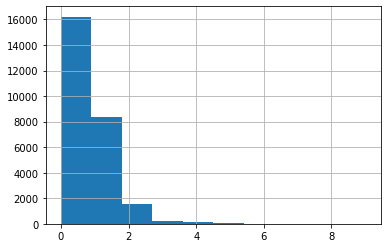

In [ ]:
train['income_total'].hist(bins=10)

In [ ]:
train['income_total']=mm.fit_transform(train.loc[:,train.columns=='income_total'])
test['income_total']=mm.transform(test.loc[:,train.columns=='income_total'])

###income_type

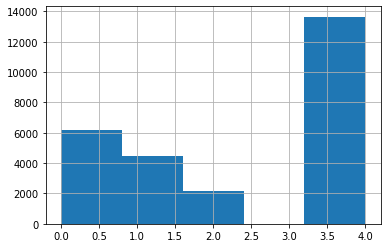

In [ ]:
train['income_type'].hist(bins=5)

In [ ]:
train['income_type']=mm.fit_transform(train.loc[:,train.columns=='income_type'])
test['income_type']=mm.transform(test.loc[:,train.columns=='income_type'])

###edu_type

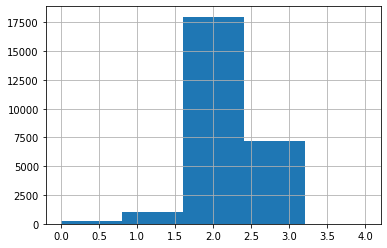

In [ ]:
train['edu_type'].hist(bins=5)

In [ ]:
train['edu_type']=sc.fit_transform(train.loc[:,train.columns=='edu_type'])
test['edu_type']=sc.transform(test.loc[:,train.columns=='edu_type'])

###family_type

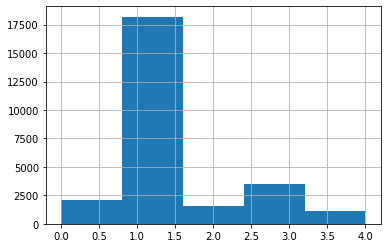

In [ ]:
train['family_type'].hist(bins=5)

In [ ]:
train['family_type']=mm.fit_transform(train.loc[:,train.columns=='family_type'])
test['family_type']=mm.transform(test.loc[:,train.columns=='family_type'])

###house_type

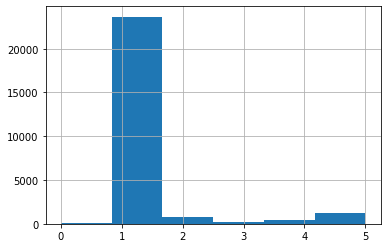

In [ ]:
train['house_type'].hist(bins=6)

In [ ]:
train['house_type']=mm.fit_transform(train.loc[:,train.columns=='house_type'])
test['house_type']=mm.transform(test.loc[:,train.columns=='house_type'])

###Days employed

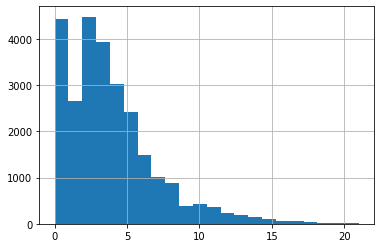

In [ ]:
train['DAYS_EMPLOYED'].hist(bins=22)

In [ ]:
train['DAYS_EMPLOYED']=mm.fit_transform(train.loc[:,train.columns=='DAYS_EMPLOYED'])
test['DAYS_EMPLOYED']=mm.transform(test.loc[:,train.columns=='DAYS_EMPLOYED'])

###occyp_type

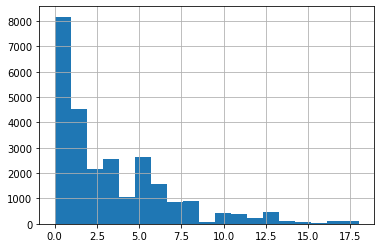

In [ ]:
train['occyp_type'].hist(bins=19)

In [ ]:
train['occyp_type']=mm.fit_transform(train.loc[:,train.columns=='occyp_type'])
test['occyp_type']=mm.transform(test.loc[:,train.columns=='occyp_type'])

###family_size

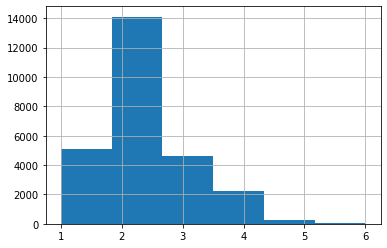

In [ ]:
train['family_size'].hist(bins=6)

In [ ]:
train['family_size']=sc.fit_transform(train.loc[:,train.columns=='family_size'])
test['family_size']=sc.transform(test.loc[:,train.columns=='family_size'])

###begin_month

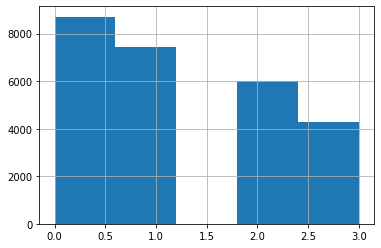

In [ ]:
train['begin_month'].hist(bins=5)

In [ ]:
train['begin_month']=mm.fit_transform(train.loc[:,train.columns=='begin_month'])
test['begin_month']=mm.transform(test.loc[:,train.columns=='begin_month'])

### Age

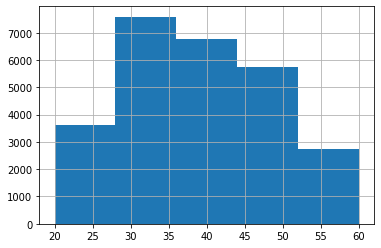

In [ ]:
train['Age'].hist(bins=5)

In [ ]:
train['Age']=sc.fit_transform(train.loc[:,train.columns=='Age'])
test['Age']=sc.transform(test.loc[:,train.columns=='Age'])

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age
index,,,,,,,,,,,,,,,,,
0,0,0,0,0,0.111111,0.0,1.421000,0.25,0.4,0.333333,0,0,0,0.000000,-0.216821,0.000000,-0.719578
1,0,0,1,1,0.111111,0.0,-0.387949,0.00,0.2,0.142857,0,0,1,0.055556,0.896616,0.000000,-0.719578
2,1,1,1,0,0.222222,1.0,1.421000,0.25,0.2,0.333333,0,1,0,0.111111,-0.216821,0.333333,0.942610
3,0,0,1,0,0.111111,0.0,-0.387949,0.25,0.2,0.190476,0,1,0,0.166667,-0.216821,0.666667,0.111516
4,0,1,1,0,0.000000,0.5,1.421000,0.25,0.2,0.190476,0,0,0,0.111111,-0.216821,0.333333,0.111516


---

#to_csv

In [ ]:
train.to_csv("preprocess_train",mode='w')
test.to_csv("preprocess_train",mode='w')